In [1]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance 

df = pd.read_table('ch6_cell28_dev_feat1_filtered.tsv',index_col=0)
df

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
name,,,,,,,,,,,,,,,,,,,,,
<http://dbpedia.org/resource/Ankara>,2.856124,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,2.452100e+10,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.477121,0.301030,0.30103,6.661582
<http://dbpedia.org/resource/Amsterdam>,3.358316,0.0,0.30103,0.301030,165760000.0,0.000000e+00,0.301030,2.193200e+08,0.301030,5.356000e+07,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.30103,5.925489
<http://dbpedia.org/resource/Aarhus>,2.561101,0.0,0.30103,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.301030,0.301030,0.00000,5.422780
<http://dbpedia.org/resource/Adelaide>,2.955207,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.301030,0.00000,6.119513
"<http://dbpedia.org/resource/Ames,_Iowa>",2.082785,0.0,0.00000,0.477121,62700000.0,6.270361e+07,0.477121,6.286000e+07,0.477121,1.553993e+05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.00000,4.770594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
<http://dbpedia.org/resource/Uralo-Kavkaz>,1.000000,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.477121,0.00000,3.407391
<http://dbpedia.org/resource/Vradiivka>,1.000000,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.477121,0.00000,3.924072
<http://dbpedia.org/resource/Alor_Gajah>,1.342423,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.00000,4.327706


In [2]:
print("Checking for missing values: ",df.isnull().values.any())

Checking for missing values:  False


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

X,y = df.drop('population',axis=1),df['population'].astype(np.float16) 
# data = df.values
# X,y = data[:,:-1], data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [4]:

'''
#Uncomment to run this cell as to see the proper number of RF estimators

model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
pair_scores_estimator = []
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
    pair_scores_estimator.append((score,n))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.savefig('rf_est_score.png')
'''

'\n#Uncomment to run this cell as to see the proper number of RF estimators\n\nmodel = RandomForestRegressor(n_jobs=-1)\nestimators = np.arange(10, 200, 10)\npair_scores_estimator = []\nscores = []\nfor n in tqdm(estimators):\n    model.set_params(n_estimators=n)\n    model.fit(X_train, y_train)\n    score = model.score(X_test, y_test)\n    scores.append(score)\n    pair_scores_estimator.append((score,n))\nplt.title("Effect of n_estimators")\nplt.xlabel("n_estimator")\nplt.ylabel("score")\nplt.plot(estimators, scores)\nplt.savefig(\'rf_est_score.png\')\n'

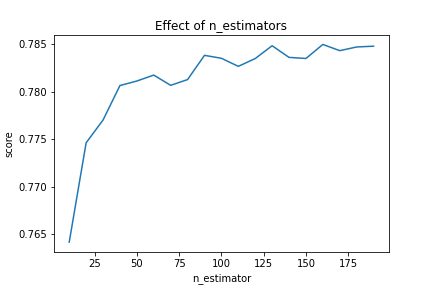

In [5]:
from IPython.display import Image
Image(filename='rf_est_score.png') 

In [6]:
# sorted_pair_scores_est = sorted(pair_scores_estimator,key=lambda tup:tup[0],reverse=True)
# best_num_est = sorted_pair_scores_est[0][1]
# print(sorted_pair_scores_est)

# Note: the higher the number of estimator, the higher test score
#       However, this leads to unnecessary computationl; therefore, it is
#       better to chose number of estimator at clink

In [7]:
# Rf training phase
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

d:\programs\anaconda3\envs\tf_gpu15\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


                                                    Importance
Feature                                                       
http://dbpedia.org/ontology/country#1@OTHER           0.226823
http://dbpedia.org/ontology/birthPlace?inv#count      0.222899
http://dbpedia.org/ontology/areaTotal#1               0.191198
http://dbpedia.org/ontology/country#1@<http://d...    0.174331
http://dbpedia.org/ontology/populationDensity#1       0.092440
...                                                        ...
http://dbpedia.org/ontology/timeZone#1@<http://...   -0.000307
http://dbpedia.org/ontology/utcOffset#1@"+2"         -0.000577
http://dbpedia.org/ontology/region#1@<http://db...   -0.000581
http://dbpedia.org/ontology/country#1@<http://d...   -0.000783
http://dbpedia.org/ontology/areaLand#2               -0.000957

[379 rows x 1 columns]


d:\programs\anaconda3\envs\tf_gpu15\lib\site-packages\rfpimp.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


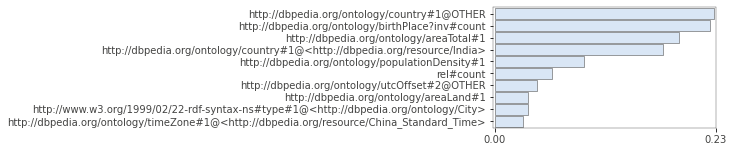

In [8]:
from rfpimp import plot_importances
from rfpimp import importances as rfpimp_importances

# Plot top10 important features according to permutation importance
imp = rfpimp_importances(rf_regressor, X_test, y_test)
print(imp)
viz = plot_importances(imp.iloc[:10,:])
viz.view()

count    44959.000000
mean         3.889512
std          0.683325
min          3.000000
25%          3.347623
50%          3.735519
75%          4.288249
max          7.385606
Name: population, dtype: float64


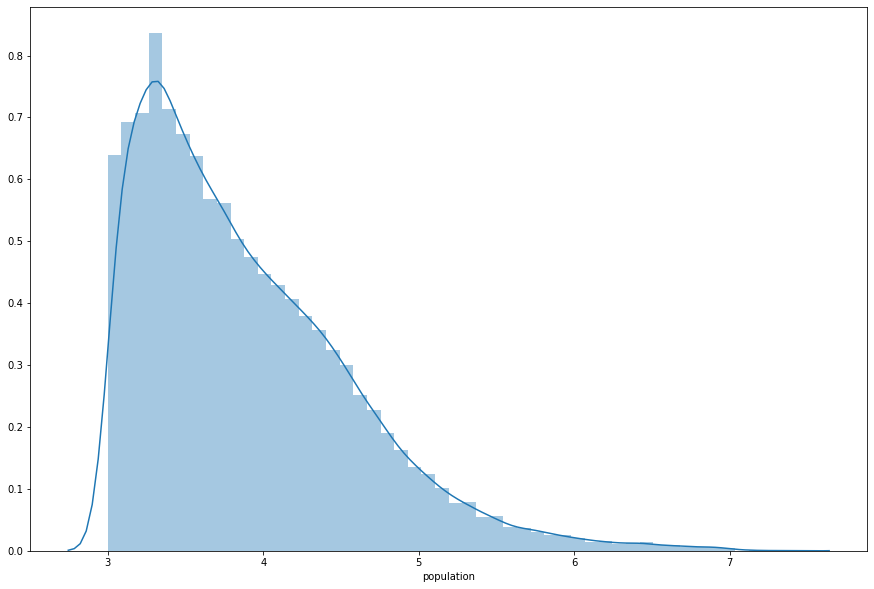

In [9]:
# print(df['http://dbpedia.org/ontology/birthPlace?inv#count'].unique())
# print(df['http://dbpedia.org/ontology/birthPlace?inv#count'])
# print(df['http://dbpedia.org/ontology/country#1@OTHER'])
# print(df['http://dbpedia.org/ontology/areaTotal#1'])

# pop = df['population'].values
# plt.hist(pop, bins = 100)
# plt.show()
print(df['population'].describe())

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['population'])

In [10]:
print(df['http://dbpedia.org/ontology/birthPlace?inv#count'].describe())

count    44959.000000
mean         0.319024
std          0.464486
min          0.000000
25%          0.000000
50%          0.000000
75%          0.477121
max          3.796505
Name: http://dbpedia.org/ontology/birthPlace?inv#count, dtype: float64


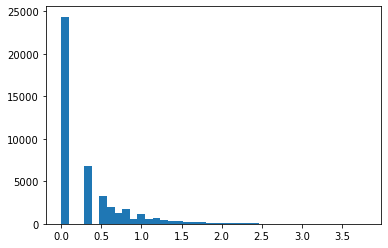

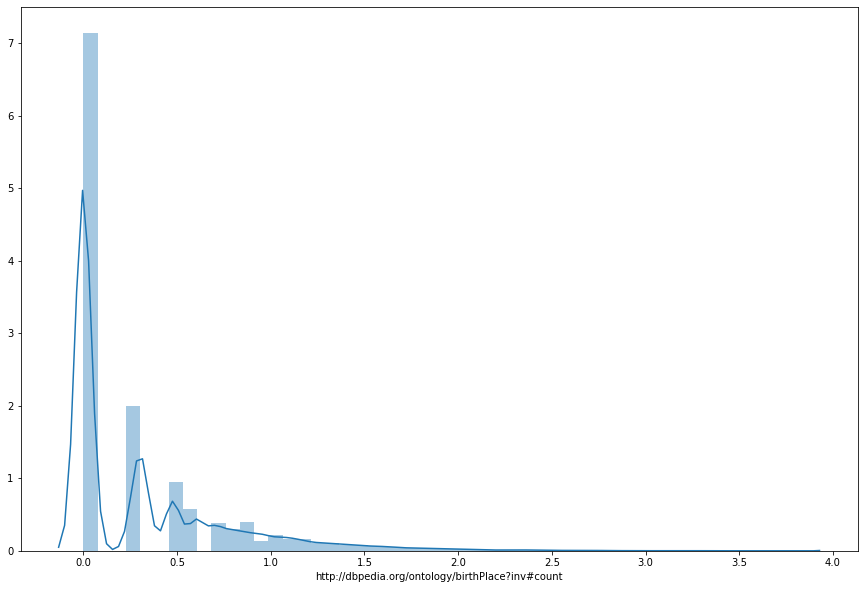

In [11]:
# print(df['http://dbpedia.org/ontology/birthPlace?inv#count'].unique())
# print(df['http://dbpedia.org/ontology/birthPlace?inv#count'].value_counts())
dict_val_count = dict(df['http://dbpedia.org/ontology/birthPlace?inv#count'].value_counts())
dict_val_count = dict(sorted(dict_val_count.items()))
# print(dict_val_count)
birth_place = df['http://dbpedia.org/ontology/birthPlace?inv#count'].values
plt.hist(birth_place, bins = 40)
plt.show()
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['http://dbpedia.org/ontology/birthPlace?inv#count'])

-------Random Forest regressor------
R2 score from original dataframe:  0.7860647866732212
Mean Absolute Error (MAE): 0.22328227581913773
Mean Squared Error (MSE): 0.10200797746094105
Root Mean Squared Error (RMSE): 0.3193868774087956
Mean Absolute Percentage Error (MAPE): 5.73
Accuracy: 94.27


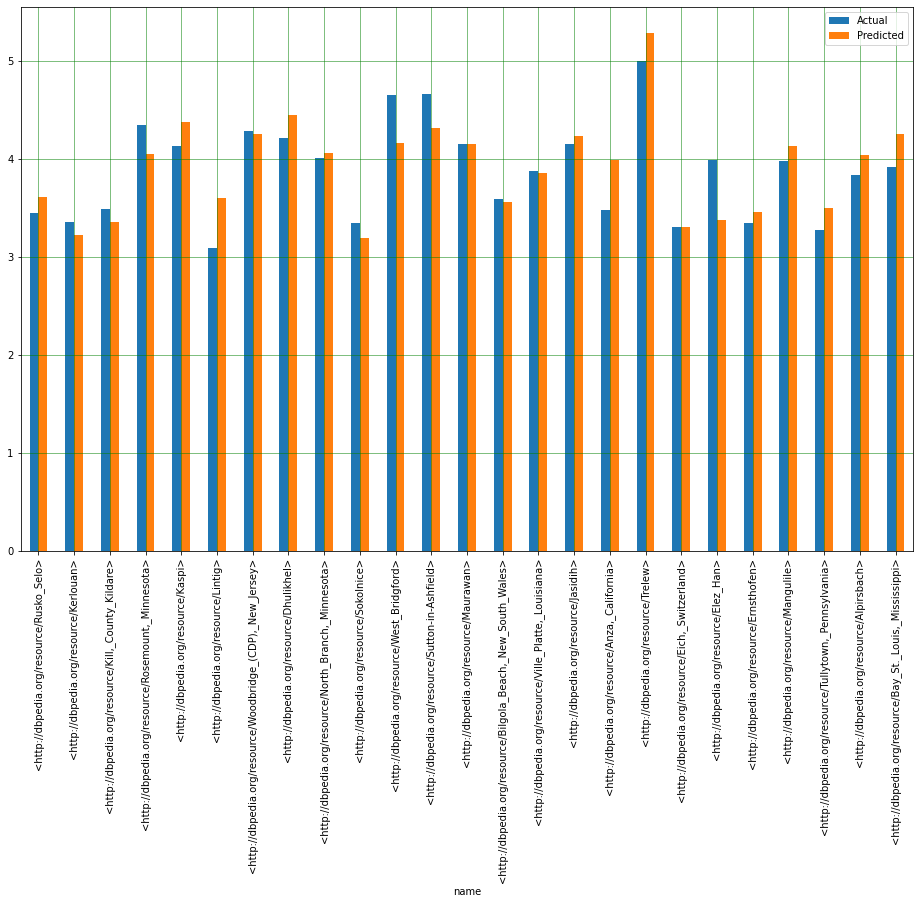

In [12]:
# Test Score of Original dataframe without FE
from sklearn import metrics
test_score =rf_regressor.score(X_test, y_test)
print('-------Random Forest regressor------')
print("R2 score from original dataframe: ",test_score)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))


df_pair_test_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_pair_test_pred.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

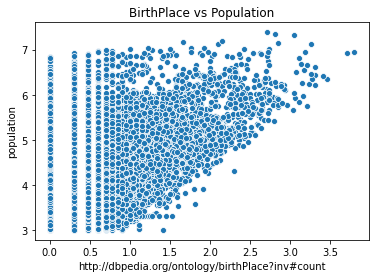

In [13]:
import seaborn as sns

sns.scatterplot(x='http://dbpedia.org/ontology/birthPlace?inv#count', y='population', data=df)  
plt.title('BirthPlace vs Population')   
plt.show()


In [14]:
import random
from sklearn import metrics

X_train_1, X_test_1= X_train.copy(), X_test.copy() 
rf_regressor_1 = RandomForestRegressor(n_estimators=10, random_state=0)

# Method 1: turn continuous values that are greater than 0 to 1; otherwise, 0

# 1.1 Keep old feature and add new feature (birthPlace)
THRESHOLD = 0
X_train_1['new_birthPlace'] = np.where(X_train_1['http://dbpedia.org/ontology/birthPlace?inv#count']>THRESHOLD,1,0)
X_test_1['new_birthPlace'] = np.where(X_test_1['http://dbpedia.org/ontology/birthPlace?inv#count']>THRESHOLD,1,0)


# cols = [random.randrange(0, 370, 1) for _ in range(365)]
# cols = list(range(0,375))
# X_train_1.drop(X_train_1.columns[cols],axis=1,inplace=True)
# X_test_1.drop(X_test_1.columns[cols],axis=1,inplace=True)
rf_regressor_1.fit(X_train_1, y_train)
y_pred_1 = rf_regressor_1.predict(X_test_1)
test_score_1 =rf_regressor_1.score(X_test_1, y_test)
print('-------Random Forest regressor with Feature Engineering 1------')
print('Keep old feature and add new engineered feature (birthPlace) (same columns)')
print("R2 score from adding new feature: ",test_score_1)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))
mape = np.mean(np.abs((y_test - y_pred_1) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

-------Random Forest regressor with Feature Engineering 1------
Keep old feature and add new engineered feature (birthPlace) (same columns)
R2 score from adding new feature:  0.7869569062259194
Mean Absolute Error (MAE): 0.22327940264045648
Mean Squared Error (MSE): 0.10158259956354415
Root Mean Squared Error (RMSE): 0.31872025282925487
Mean Absolute Percentage Error (MAPE): 5.72
Accuracy: 94.28


In [15]:
X_train_1, X_test_1= X_train.copy(), X_test.copy() 

# 1.2 Drop old feature and add new feature
THRESHOLD = 0
X_train_1['new_birthPlace'] = np.where(X_train_1['http://dbpedia.org/ontology/birthPlace?inv#count']>THRESHOLD,1,0)
X_test_1['new_birthPlace'] = np.where(X_test_1['http://dbpedia.org/ontology/birthPlace?inv#count']>THRESHOLD,1,0)
X_train_1 = X_train_1.drop('http://dbpedia.org/ontology/birthPlace?inv#count',axis=1)
X_test_1 = X_test_1.drop('http://dbpedia.org/ontology/birthPlace?inv#count',axis=1)

rf_regressor_1.fit(X_train_1, y_train)
y_pred_1 = rf_regressor_1.predict(X_test_1)

test_score_1 =rf_regressor_1.score(X_test_1, y_test)
print('-------Random Forest regressor with Feature Engineering 2------')
print('Drop old feature and add new engineered feature (same columns)')
print("R2 score from adding new feature and dropping old feature: ",test_score_1)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))
mape = np.mean(np.abs((y_test - y_pred_1) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

-------Random Forest regressor with Feature Engineering 2------
Drop old feature and add new engineered feature (same columns)
R2 score from adding new feature and dropping old feature:  0.7805517593141932
Mean Absolute Error (MAE): 0.22623173781730424
Mean Squared Error (MSE): 0.10463668342213445
Root Mean Squared Error (RMSE): 0.32347593947948344
Mean Absolute Percentage Error (MAPE): 5.79
Accuracy: 94.21


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm#
y_pred = regressor.predict(X_test)
print('-------Simple Linear regressor ------')
print('R2 score: ', metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))



-------Simple Linear regressor ------
R2 score:  0.6550820100396604
Mean Absolute Error (MAE): 0.3051913671285572
Mean Squared Error (MSE): 0.1611977943310578
Root Mean Squared Error (RMSE): 0.40149445118339777
Mean Absolute Percentage Error (MAPE): 7.91
Accuracy: 92.09


Question:
A write-up of up to 200 words (you will be penalized if you write more than 200 words!) concluding whether the new feature worked or not and why you think that is the case. Consider also future recommendations (further drill-down, drop, discretize, etc).

Answer: 

   From original dataframe with RandomForest, the model was trained and evaluated with result of 0.786 R2 score and 94.27% accuracy (cell-12). We used Permutation Importances to find the most important feature for our model. We obtained the BirthPlace column with the highest feature importance score and it has continuous values with basic statistics described in cell-10. 
           
   Later, we did FE in two different methods shown in cell-14 and cell-15, both R2 score and accuracy are rarely different from the non-FE result. In cell-14, we added the new feature column that was engineered after the BirthPlace column by changing values in column based on threshold. In cell-15, we did the same FE with BirthPlace column; however, in this cell we replaced original BithPlace column with our new engineered column using the same threshold as cell-14. 
          
   For threshold value, we trained model with different threshold based on basic statistics like mean, median, random value, and quantiles(cell-10) and found out that the R2 score and accuracy are almost the same.
          
   The almost similar results may be the fact that this dataset is too simple and our model is very powerful (we can observe in cell-16 even Linear Regressor can obtain very high accuracy.)     
          

In [17]:
ans ='From original dataframe with RandomForest, the model was trained and evaluated with result of 0.786 R2 score and 94.27% accuracy (cell-12). We used Permutation Importances to find the most important feature for our model. We obtained the BirthPlace column with the highest feature importance score and it has continuous values with basic statistics described in cell-10. Later, we did FE in two different methods shown in cell-14 and cell-15, both R2 score and accuracy are rarely different from the non-FE result. In cell-14, we added the new feature column that was engineered after the BirthPlace column by changing values in column based on threshold. In cell-15, we did the same FE with BirthPlace column; however, in this cell we replaced original BithPlace column with our new engineered column using the same threshold as cell-14. For threshold value, we trained model with different threshold based on basic statistics like mean, median, random value, and quantiles(cell-10) and found out that the R2 score and accuracy are almost the same. The almost same result may be the fact that this dataset is too simple and our model is very powerful (we can observe in cell-16 even Linear Regressor can obtain very high accuracy.) '
print("word count: ",len(ans.split()))

word count:  200
